# **DATA LOADING AND EXPLORATION**:

In [474]:
#importing libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import folium

In [475]:
#loading  and previewing rainfall data sets:
rainfal=pd.read_csv("kenya_rainfall_2022_2024.csv")
rainfal.head()

,time,precipitation_sum (mm),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,town
0,01/01/2022,0.0,NaN,NaN,NaN,NaN,Nairobi
1,02/01/2022,0.0,NaN,NaN,NaN,NaN,Nairobi
2,03/01/2022,0.0,NaN,NaN,NaN,NaN,Nairobi
3,04/01/2022,0.0,NaN,NaN,NaN,NaN,Nairobi
4,05/01/2022,0.0,NaN,NaN,NaN,NaN,Nairobi


In [476]:
#loading and previewing wfp food prices
foodprices=pd.read_csv('wfp_food_prices_ken.csv')
foodprices.head()

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#loc+market+code,#geo+lat,#geo+lon,#item+type,#item+name,#item+code,#item+unit,#item+price+flag,#item+price+type,#currency+code,#value,#value+usd
1,2006-01-15,Coast,Mombasa,Mombasa,191,-4.05,39.67,pulses and nuts,Beans,50,KG,actual,Wholesale,KES,33.63,0.47
2,2006-01-15,Eastern,Kitui,Kitui,187,-1.37,38.02,cereals and tubers,Potatoes (Irish),148,50 KG,actual,Wholesale,KES,1249.99,17.39
3,2006-01-15,Eastern,Kitui,Kitui,187,-1.37,38.02,cereals and tubers,Sorghum,65,90 KG,actual,Wholesale,KES,1800,25.03
4,2006-01-15,Eastern,Kitui,Kitui,187,-1.37,38.02,pulses and nuts,Beans (dry),262,KG,actual,Retail,KES,39,0.54


In [477]:
#loading and previewing cities data:
towns=pd.read_csv('cities_latitude_and_longitudes.csv')
towns.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Nairobi,-1.2864,36.8172,Kenya,KE,Nairobi City,primary,5545000.0,5545000.0
1,Mombasa,-4.0500,39.6667,Kenya,KE,Mombasa,admin,1208333.0,1200000.0
2,Nakuru,-0.3000,36.0667,Kenya,KE,Nakuru,admin,570674.0,307990.0
3,Eldoret,0.5167,35.2833,Kenya,KE,Uasin Gishu,admin,475716.0,289380.0
4,Kisumu,-0.0833,34.7667,Kenya,KE,Kisumu,admin,409928.0,409928.0


In [478]:
#previewing foodprices columns
list(foodprices.columns)

['date',
 'admin1',
 'admin2',
 'market',
 'market_id',
 'latitude',
 'longitude',
 'category',
 'commodity',
 'commodity_id',
 'unit',
 'priceflag',
 'pricetype',
 'currency',
 'price',
 'usdprice']

In [479]:
#previewing rainfal columns
list(rainfal.columns)

['time',
 'precipitation_sum (mm)',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'town']

In [480]:
foodprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12783 entries, 0 to 12782
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          12783 non-null  object
 1   admin1        12749 non-null  object
 2   admin2        12749 non-null  object
 3   market        12783 non-null  object
 4   market_id     12783 non-null  object
 5   latitude      12749 non-null  object
 6   longitude     12749 non-null  object
 7   category      12783 non-null  object
 8   commodity     12783 non-null  object
 9   commodity_id  12783 non-null  object
 10  unit          12783 non-null  object
 11  priceflag     12783 non-null  object
 12  pricetype     12783 non-null  object
 13  currency      12783 non-null  object
 14  price         12783 non-null  object
 15  usdprice      12783 non-null  object
dtypes: object(16)
memory usage: 1.6+ MB


Food price data has 12783 rows.
columns such as date price are of string data types.

In [481]:
#Checking for null values:
foodprices.isnull().sum()

date             0
admin1          34
admin2          34
market           0
market_id        0
latitude        34
longitude       34
category         0
commodity        0
commodity_id     0
unit             0
priceflag        0
pricetype        0
currency         0
price            0
usdprice         0
dtype: int64

Food prices has a total of 34 rows with null values under the region, subregion,latitude and longitude columns.

In [482]:
rainfal.isnull().sum()

time                         61
precipitation_sum (mm)       61
Unnamed: 2                69109
Unnamed: 3                69109
Unnamed: 4                69109
Unnamed: 5                69109
town                         61
dtype: int64

Unnamed columns in rainfall dataset have 69109 null values while time and precipitation columsn have 61 missing values

In [483]:
rainfal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69109 entries, 0 to 69108
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    69048 non-null  object 
 1   precipitation_sum (mm)  69048 non-null  float64
 2   Unnamed: 2              0 non-null      float64
 3   Unnamed: 3              0 non-null      float64
 4   Unnamed: 4              0 non-null      float64
 5   Unnamed: 5              0 non-null      float64
 6   town                    69048 non-null  object 
dtypes: float64(5), object(2)
memory usage: 3.7+ MB


Rainfal data has 69048 rows. Time column has string data type.
The data has 4 columns with null values 

In [484]:
#loading and previewing crop_yeilds
crop_yeilds=pd.read_csv('hvstat_africa_data_v1.0.csv')
crop_yeilds.head()

,fnid,country,country_code,admin_1,admin_2,product,season_name,planting_year,planting_month,harvest_year,harvest_month,crop_production_system,qc_flag,area,production,yield
0,AO2008A101,Angola,AO,Bengo,none,Banana,Main,2007,10,2008,4,All (PS),0,1364.0,19588.0,14.360704
1,AO2008A101,Angola,AO,Bengo,none,Banana,Main,2008,10,2009,4,All (PS),0,1364.0,20461.0,15.000733
2,AO2008A101,Angola,AO,Bengo,none,Banana,Main,2014,10,2015,4,All (PS),0,8706.0,222044.0,25.504709
3,AO2008A101,Angola,AO,Bengo,none,Banana,Main,2015,10,2016,4,All (PS),0,8706.0,222044.0,25.504709
4,AO2008A101,Angola,AO,Bengo,none,Banana,Main,2016,10,2017,4,All (PS),0,9549.7,233967.0,24.499932


In [485]:
#extracting kenyan food_yeild data:
Kenya_crop_yeilds=crop_yeilds[crop_yeilds['country'].str.lower()=='kenya']
Kenya_crop_yeilds.head()

,fnid,country,country_code,admin_1,admin_2,product,season_name,planting_year,planting_month,harvest_year,harvest_month,crop_production_system,qc_flag,area,production,yield
79170,KE2013A101,Kenya,KE,Mombasa,none,Banana,Annual,2013,1,2012,12,All (PS),0,125.1,1110.0,8.872902
79171,KE2013A101,Kenya,KE,Mombasa,none,Banana,Annual,2014,1,2013,12,All (PS),0,121.5,952.0,7.835391
79172,KE2013A101,Kenya,KE,Mombasa,none,Banana,Annual,2023,1,2022,12,All (PS),0,39.0,600.0,15.384615
79173,KE2013A101,Kenya,KE,Mombasa,none,Beans (mixed),Annual,1986,1,1985,12,All (PS),0,3.0,2.0,0.666667
79174,KE2013A101,Kenya,KE,Mombasa,none,Beans (mixed),Annual,1987,1,1986,12,All (PS),0,7.0,6.0,0.857143


#  **DATA PRE PROCESSING AND FEATURE ENGINEERING**:


In [486]:
#renaming columns in food price data:
foodprices=foodprices.rename(columns={"date": "Date",
    "admin1": "Region",
    "admin2": "Subregion",
    "market": "Market",
    "market_id": "Market_ID",
    "latitude": "Latitude",
    "longitude": "Longitude",
    "category": "Category",
    "commodity": "Commodity",
    "commodity_id": "Commodity_ID",
    "unit": "Unit",
    "priceflag": "Price_Flag",
    "pricetype": "Price_Type",
    "currency": "Currency",
    "price": "Price_KES",
    "usdprice": "Price_USD"  
})
foodprices.head()

,Date,Region,Subregion,Market,Market_ID,Latitude,Longitude,Category,Commodity,Commodity_ID,Unit,Price_Flag,Price_Type,Currency,Price_KES,Price_USD
0,#date,#adm1+name,#adm2+name,#loc+market+name,#loc+market+code,#geo+lat,#geo+lon,#item+type,#item+name,#item+code,#item+unit,#item+price+flag,#item+price+type,#currency+code,#value,#value+usd
1,2006-01-15,Coast,Mombasa,Mombasa,191,-4.05,39.67,pulses and nuts,Beans,50,KG,actual,Wholesale,KES,33.63,0.47
2,2006-01-15,Eastern,Kitui,Kitui,187,-1.37,38.02,cereals and tubers,Potatoes (Irish),148,50 KG,actual,Wholesale,KES,1249.99,17.39
3,2006-01-15,Eastern,Kitui,Kitui,187,-1.37,38.02,cereals and tubers,Sorghum,65,90 KG,actual,Wholesale,KES,1800,25.03
4,2006-01-15,Eastern,Kitui,Kitui,187,-1.37,38.02,pulses and nuts,Beans (dry),262,KG,actual,Retail,KES,39,0.54


In [487]:
# converting foodprices prices to float:
foodprices['Price_USD']=pd.to_numeric(foodprices['Price_USD'],errors='coerce')
foodprices['Price_KES']=pd.to_numeric(foodprices['Price_KES'],errors='coerce')
#changeing date to date format
foodprices['Date']=pd.to_datetime(foodprices['Date'],format='%Y-%m-%d',errors='coerce')
foodprices.head(2)

,Date,Region,Subregion,Market,Market_ID,Latitude,Longitude,Category,Commodity,Commodity_ID,Unit,Price_Flag,Price_Type,Currency,Price_KES,Price_USD
0,NaT,#adm1+name,#adm2+name,#loc+market+name,#loc+market+code,#geo+lat,#geo+lon,#item+type,#item+name,#item+code,#item+unit,#item+price+flag,#item+price+type,#currency+code,NaN,NaN
1,2006-01-15,Coast,Mombasa,Mombasa,191,-4.05,39.67,pulses and nuts,Beans,50,KG,actual,Wholesale,KES,33.63,0.47


In [488]:
#removing rows in food price with misisng criticla values:
foodprices.dropna(subset=['Commodity','Price_KES','Date','Market'],inplace=True)
foodprices.head(2)

,Date,Region,Subregion,Market,Market_ID,Latitude,Longitude,Category,Commodity,Commodity_ID,Unit,Price_Flag,Price_Type,Currency,Price_KES,Price_USD
1,2006-01-15,Coast,Mombasa,Mombasa,191,-4.05,39.67,pulses and nuts,Beans,50,KG,actual,Wholesale,KES,33.63,0.47
2,2006-01-15,Eastern,Kitui,Kitui,187,-1.37,38.02,cereals and tubers,Potatoes (Irish),148,50 KG,actual,Wholesale,KES,1249.99,17.39


In [489]:
foodprices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12782 entries, 1 to 12782
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          12782 non-null  datetime64[ns]
 1   Region        12748 non-null  object        
 2   Subregion     12748 non-null  object        
 3   Market        12782 non-null  object        
 4   Market_ID     12782 non-null  object        
 5   Latitude      12748 non-null  object        
 6   Longitude     12748 non-null  object        
 7   Category      12782 non-null  object        
 8   Commodity     12782 non-null  object        
 9   Commodity_ID  12782 non-null  object        
 10  Unit          12782 non-null  object        
 11  Price_Flag    12782 non-null  object        
 12  Price_Type    12782 non-null  object        
 13  Currency      12782 non-null  object        
 14  Price_KES     12782 non-null  float64       
 15  Price_USD     12782 non-null  float64    

In [490]:
foodprices.describe()

,Date,Price_KES,Price_USD
count,12782,12782.000000,12782.000000
mean,2019-07-26 00:59:35.778438400,1780.668971,16.436858
min,2006-01-15 00:00:00,5.000000,0.044000
25%,2017-02-15 00:00:00,60.000000,0.570000
50%,2021-06-15 00:00:00,150.000000,1.210000
75%,2023-01-15 00:00:00,2644.000000,25.237500
max,2025-05-15 00:00:00,19800.000000,184.820000
std,NaN,2905.224440,25.793262


In [491]:
#checking for distinct commodity names
commodity_names=foodprices['Commodity'].value_counts()
commodity_names

Commodity
Beans (dry)                  1155
Maize (white)                1153
Maize                        1009
Potatoes (Irish)              846
Sorghum                       646
Beans                         547
Oil (vegetable)               527
Wheat flour                   422
Salt                          412
Rice                          408
Sugar                         383
Maize flour                   376
Tomatoes                      346
Milk (UHT)                    339
Cabbage                       319
Bananas                       318
Kale                          317
Maize (white, dry)            278
Onions (dry)                  273
Beans (yellow)                246
Potatoes (Irish, white)       238
Meat (beef)                   208
Meat (goat)                   202
Cowpeas                       174
Meat (camel)                  160
Beans (rosecoco)              160
Rice (aromatic)               149
Beans (dolichos)              138
Bread                         126
Milk

In [492]:
foodpricesmarkes=foodprices['Market'].value_counts()
foodpricesmarkes.head()

Market
Nairobi                       1231
Eldoret town (Uasin Gishu)     957
Kisumu                         673
Mombasa                        448
Kitui                          440
Name: count, dtype: int64

In [493]:
#standardizing text formats:
foodprices['Commodity']=foodprices['Commodity'].str.strip().str.lower()
foodprices['Category']=foodprices['Category'].str.strip().str.lower()
foodprices['Region']=foodprices['Region'].str.strip().str.lower()

In [494]:
#Standardizing commodity naming:
commodity_map={ "beans (dry)": "dry beans",
    "beans (mung)": "mung beans",
    "beans (dolichos)": "dolichos beans","maize (white)":"fresh white maize",
     "maize": "dry white maize",
    "maize (white, dry)": "dry white maize",
    "potatoes (irish)": "irish potatoes",
    "potatoes (irish, red)": "red irish potatoes",
    "potatoes (irish, white)": "white irish potatoes",
    "milk (cow, pasteurized)": "pasteurized cow milk",
    "milk (cow, fresh)": "fresh cow milk",
    "milk (camel, fresh)": "fresh camel milk",
    "milk (uht)": "UHT milk",
    "meat (camel)": "camel meat",
    "meat (goat)": "goat meat",
    "meat (beef)": "beef",
    "fish (omena, dry)": "dry omena fish",
    "fuel (diesel)": "diesel",
    "fuel (kerosene)": "kerosene",
    "fuel (petrol-gasoline)": "petrol",
    "oil (vegetable)": "vegetable oil",
    "wheat flour": "wheat flour",
    "maize flour": "maize flour",
    "onions (dry)": "dry onions",
    "onions (red)": "red onions",
    "cowpea leaves": "cowpea leaves",
    "cooking fat": "cooking fat",
    'red onions':'dry onions'
               
              }

In [495]:
foodprices['Commodity']=foodprices['Commodity'].replace(commodity_map)

In [496]:
commodity_names=foodprices['Commodity'].value_counts()
commodity_names

Commodity
dry white maize              1287
dry beans                    1155
fresh white maize            1153
irish potatoes                846
sorghum                       646
beans                         547
vegetable oil                 527
wheat flour                   422
salt                          412
rice                          408
sugar                         383
maize flour                   376
tomatoes                      346
UHT milk                      339
cabbage                       319
bananas                       318
kale                          317
dry onions                    273
beans (yellow)                246
white irish potatoes          238
beef                          208
goat meat                     202
cowpeas                       174
camel meat                    160
beans (rosecoco)              160
rice (aromatic)               149
dolichos beans                138
bread                         126
pasteurized cow milk          118
red 

In [497]:
#unique commodity per market:
Commodity_counts=foodprices.groupby ('Market')['Commodity'].nunique().reset_index(name='Unique_commodities')
Commodity_counts=Commodity_counts.sort_values(by='Unique_commodities',ascending=False)
Commodity_counts .head()

,Market,Unique_commodities
44,Marigat town (Baringo),34
24,Kangemi (Nairobi),34
7,Garissa town (Garissa),30
4,Eldoret town (Uasin Gishu),24
33,Kitengela (Kajiado),21


In [498]:
foodprices.head()

,Date,Region,Subregion,Market,Market_ID,Latitude,Longitude,Category,Commodity,Commodity_ID,Unit,Price_Flag,Price_Type,Currency,Price_KES,Price_USD
1,2006-01-15,coast,Mombasa,Mombasa,191,-4.05,39.67,pulses and nuts,beans,50,KG,actual,Wholesale,KES,33.63,0.47
2,2006-01-15,eastern,Kitui,Kitui,187,-1.37,38.02,cereals and tubers,irish potatoes,148,50 KG,actual,Wholesale,KES,1249.99,17.39
3,2006-01-15,eastern,Kitui,Kitui,187,-1.37,38.02,cereals and tubers,sorghum,65,90 KG,actual,Wholesale,KES,1800.00,25.03
4,2006-01-15,eastern,Kitui,Kitui,187,-1.37,38.02,pulses and nuts,dry beans,262,KG,actual,Retail,KES,39.00,0.54
5,2006-01-15,eastern,Marsabit,Marsabit,190,2.33,37.98,cereals and tubers,fresh white maize,67,KG,actual,Retail,KES,21.00,0.29


In [499]:
#checking unique markets using Market column
unique_markets=foodprices['Market'].unique()
print (unique_markets)

['Mombasa' 'Kitui' 'Marsabit' 'Nairobi' 'Mandera' 'Kisumu'
 'Lodwar (Turkana)' 'Eldoret town (Uasin Gishu)' 'Nakuru'
 'Hola (Tana River)' 'Kilifi' 'Garissa' 'Marigat (Baringo)' 'Kajiado'
 'Karatina (Nyeri)' 'Vanga (Kwale)' 'Kitui town (Kitui)' 'Makueni'
 'Wote town (Makueni)' 'Kitengela (Kajiado)' 'Garissa town (Garissa)'
 'Takaba (Mandera)' 'Marigat town (Baringo)'
 'Illbissil Food Market (Kajiado)' 'Wakulima (Nakuru)'
 'Kongowea (Mombasa)' 'Tala Centre Market (Machakos)' 'Kangemi (Nairobi)'
 'Kibuye (Kisumu)' 'Makutano (West Pokot)' 'Kathonzweni (Makueni)'
 'Kaanwa (Tharaka Nithi)' 'Lomut (West Pokot)' 'Wakulima (Nairobi)'
 'Dagahaley (Daadab)' 'Bangladesh (Mombasa)' 'Kalahari (Mombasa)'
 'Shonda (Mombasa)' 'Kawangware (Nairobi)' 'Kibra (Nairobi)'
 'Mathare (Nairobi)' 'Mukuru (Nairobi)' 'Hagadera (Daadab)'
 'Kalobeyei (Village 1)' 'Kalobeyei (Village 2)' 'Kalobeyei (Village 3)'
 'Isiolo town' 'Dandora (Nairobi)' 'Wajir town' 'Ethiopia (Kakuma)'
 'HongKong (Kakuma)' 'Kakuma 2' 'Kakuma

In [500]:
#Extracting common market name from Market column:
def extract_first_name(market):
    if '(' in market:
        market=market.split('(')[0]
    return market.split('(')[0]
foodprices['Market_Name']=foodprices['Market'].apply(extract_first_name)

In [501]:
#To check unique Market_Name
Unique_foodprices_Market_Name=foodprices['Market_Name'].unique()
print (Unique_foodprices_Market_Name)

['Mombasa' 'Kitui' 'Marsabit' 'Nairobi' 'Mandera' 'Kisumu' 'Lodwar '
 'Eldoret town ' 'Nakuru' 'Hola ' 'Kilifi' 'Garissa' 'Marigat ' 'Kajiado'
 'Karatina ' 'Vanga ' 'Kitui town ' 'Makueni' 'Wote town ' 'Kitengela '
 'Garissa town ' 'Takaba ' 'Marigat town ' 'Illbissil Food Market '
 'Wakulima ' 'Kongowea ' 'Tala Centre Market ' 'Kangemi ' 'Kibuye '
 'Makutano ' 'Kathonzweni ' 'Kaanwa ' 'Lomut ' 'Dagahaley ' 'Bangladesh '
 'Kalahari ' 'Shonda ' 'Kawangware ' 'Kibra ' 'Mathare ' 'Mukuru '
 'Hagadera ' 'Kalobeyei ' 'Isiolo town' 'Dandora ' 'Wajir town'
 'Ethiopia ' 'HongKong ' 'Kakuma 2' 'Kakuma 3' 'Kakuma 4' 'Lodwar town'
 'Mogadishu ' 'Junda ' 'Moroto ' 'Dadaab town' 'IFO ' 'Kisumu Ndogo '
 'Marsabit town']


In [502]:
#cleaning market_name to drop unnecssary words in the name
foodprices['Market_Name']=(foodprices['Market_Name'].str.replace(r'\b(town|food|centre)\b','',case=False,regex=True).str.replace(r'|s+', '',regex=True).str.strip()
                          .str.title())

#setting  title case:
foodprices['Region']=foodprices['Region'].str.title()
foodprices['Subregion']=foodprices['Subregion'].str.title()
foodprices['Category']=foodprices['Category'].str.title()
foodprices['Category']=foodprices['Category'].str.title() 
foodprices['Commodity']=foodprices['Commodity'].str.title() 

In [503]:
Unique_foodprices_Market_Name=foodprices['Market_Name'].unique()
print (Unique_foodprices_Market_Name)

['Mombaa' 'Kitui' 'Marabit' 'Nairobi' 'Mandera' 'Kiumu' 'Lodwar' 'Eldoret'
 'Nakuru' 'Hola' 'Kilifi' 'Garia' 'Marigat' 'Kajiado' 'Karatina' 'Vanga'
 'Makueni' 'Wote' 'Kitengela' 'Takaba' 'Illbiil  Market' 'Wakulima'
 'Kongowea' 'Tala  Market' 'Kangemi' 'Kibuye' 'Makutano' 'Kathonzweni'
 'Kaanwa' 'Lomut' 'Dagahaley' 'Bangladeh' 'Kalahari' 'Shonda' 'Kawangware'
 'Kibra' 'Mathare' 'Mukuru' 'Hagadera' 'Kalobeyei' 'Iiolo' 'Dandora'
 'Wajir' 'Ethiopia' 'Hongkong' 'Kakuma 2' 'Kakuma 3' 'Kakuma 4' 'Mogadihu'
 'Junda' 'Moroto' 'Dadaab' 'Ifo' 'Kiumu Ndogo']


In [504]:
unique_Subregion=foodprices['Subregion'].unique()
print (unique_Subregion)

['Mombasa' 'Kitui' 'Marsabit' 'Nairobi' 'Mandera' 'Kisumu' 'Turkana'
 'Uasin Gishu' 'Nakuru' nan 'Kilifi' 'Garissa' 'Baringo' 'Kajiado' 'Nyeri'
 'Kwale' 'Makueni' 'Machakos' 'West Pokot' 'Meru South' 'Isiolo' 'Wajir']


In [505]:
cleaned_food_prices=foodprices
cleaned_food_prices.head()


,Date,Region,Subregion,Market,Market_ID,Latitude,Longitude,Category,Commodity,Commodity_ID,Unit,Price_Flag,Price_Type,Currency,Price_KES,Price_USD,Market_Name
1,2006-01-15,Coast,Mombasa,Mombasa,191,-4.05,39.67,Pulses And Nuts,Beans,50,KG,actual,Wholesale,KES,33.63,0.47,Mombaa
2,2006-01-15,Eastern,Kitui,Kitui,187,-1.37,38.02,Cereals And Tubers,Irish Potatoes,148,50 KG,actual,Wholesale,KES,1249.99,17.39,Kitui
3,2006-01-15,Eastern,Kitui,Kitui,187,-1.37,38.02,Cereals And Tubers,Sorghum,65,90 KG,actual,Wholesale,KES,1800.00,25.03,Kitui
4,2006-01-15,Eastern,Kitui,Kitui,187,-1.37,38.02,Pulses And Nuts,Dry Beans,262,KG,actual,Retail,KES,39.00,0.54,Kitui
5,2006-01-15,Eastern,Marsabit,Marsabit,190,2.33,37.98,Cereals And Tubers,Fresh White Maize,67,KG,actual,Retail,KES,21.00,0.29,Marabit


**DATA CLEANING RAINFALL DATA:**

In [506]:
#dropping unecessary columns in rainfall data
rainfal=rainfal.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'])
rainfal.head()

,time,precipitation_sum (mm),town
0,01/01/2022,0.0,Nairobi
1,02/01/2022,0.0,Nairobi
2,03/01/2022,0.0,Nairobi
3,04/01/2022,0.0,Nairobi
4,05/01/2022,0.0,Nairobi


In [507]:
#renaming columns innrainfal data 
rainfal=rainfal.rename(columns={'time':'Date','precipitation_sum (mm)':'Rainfall_MM',"town": "Town"})
rainfal.head()

,Date,Rainfall_MM,Town
0,01/01/2022,0.0,Nairobi
1,02/01/2022,0.0,Nairobi
2,03/01/2022,0.0,Nairobi
3,04/01/2022,0.0,Nairobi
4,05/01/2022,0.0,Nairobi


In [508]:
#setting  title case:
rainfal['Town']=rainfal['Town'].str.title()

In [509]:
#converting  to date format and summarizing rainfall per month year
rainfal['Date']=pd.to_datetime(rainfal['Date'],dayfirst=True,errors='coerce')
rainfal['YearMonth']=rainfal['Date'].dt.to_period('M')
Mothly_Rainfal=rainfal.groupby(['Town','YearMonth'])['Rainfall_MM'].sum().reset_index()
Mothly_Rainfal=Mothly_Rainfal.sort_values(['Town','YearMonth'])
Mothly_Rainfal.head()

,Town,YearMonth,Rainfall_MM
0,Bungoma,2022-01,50.6
1,Bungoma,2022-02,37.3
2,Bungoma,2022-03,31.0
3,Bungoma,2022-04,218.4
4,Bungoma,2022-05,244.6


In [510]:
Mothly_Rainfal['Year']=Mothly_Rainfal['YearMonth'].dt.year
Mothly_Rainfal['Month']=Mothly_Rainfal['YearMonth'].dt.month
Mothly_Rainfal.head()

,Town,YearMonth,Rainfall_MM,Year,Month
0,Bungoma,2022-01,50.6,2022,1
1,Bungoma,2022-02,37.3,2022,2
2,Bungoma,2022-03,31.0,2022,3
3,Bungoma,2022-04,218.4,2022,4
4,Bungoma,2022-05,244.6,2022,5


**DATA CLEANING CITIES DATA:**

In [511]:
towns.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Nairobi,-1.2864,36.8172,Kenya,KE,Nairobi City,primary,5545000.0,5545000.0
1,Mombasa,-4.0500,39.6667,Kenya,KE,Mombasa,admin,1208333.0,1200000.0
2,Nakuru,-0.3000,36.0667,Kenya,KE,Nakuru,admin,570674.0,307990.0
3,Eldoret,0.5167,35.2833,Kenya,KE,Uasin Gishu,admin,475716.0,289380.0
4,Kisumu,-0.0833,34.7667,Kenya,KE,Kisumu,admin,409928.0,409928.0


In [512]:
towns.columns=towns.columns.str.capitalize()
towns=towns.rename(columns={'Lat':'Latitude','Lng':'Longitude','City':'Town'})
towns.head()

,Town,Latitude,Longitude,Country,Iso2,Admin_name,Capital,Population,Population_proper
0,Nairobi,-1.2864,36.8172,Kenya,KE,Nairobi City,primary,5545000.0,5545000.0
1,Mombasa,-4.0500,39.6667,Kenya,KE,Mombasa,admin,1208333.0,1200000.0
2,Nakuru,-0.3000,36.0667,Kenya,KE,Nakuru,admin,570674.0,307990.0
3,Eldoret,0.5167,35.2833,Kenya,KE,Uasin Gishu,admin,475716.0,289380.0
4,Kisumu,-0.0833,34.7667,Kenya,KE,Kisumu,admin,409928.0,409928.0


In [513]:
towns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Town               63 non-null     object 
 1   Latitude           63 non-null     float64
 2   Longitude          63 non-null     float64
 3   Country            63 non-null     object 
 4   Iso2               63 non-null     object 
 5   Admin_name         63 non-null     object 
 6   Capital            44 non-null     object 
 7   Population         55 non-null     float64
 8   Population_proper  55 non-null     float64
dtypes: float64(4), object(5)
memory usage: 4.6+ KB


There are 63 towns in the data . Only 55 towns have population values. 

In [514]:
#The towns with misisng population data are :
missing_pop=towns[towns['Population'].isna()]
missing_pop

,Town,Latitude,Longitude,Country,Iso2,Admin_name,Capital,Population,Population_proper
55,Kabarnet,0.4940,35.7440,Kenya,KE,Baringo,admin,NaN,NaN
56,Migori,-1.0634,34.4731,Kenya,KE,Migori,admin,NaN,NaN
57,Nyamira,-0.5210,34.9140,Kenya,KE,Nyamira,admin,NaN,NaN
58,Sotik Post,-0.7813,35.3416,Kenya,KE,Bomet,admin,NaN,NaN
59,Murang’a,-0.7167,37.1500,Kenya,KE,Murang’a,admin,NaN,NaN
60,Siaya,0.0667,34.2833,Kenya,KE,Siaya,admin,NaN,NaN
61,Kapenguria,1.2333,35.1167,Kenya,KE,West Pokot,admin,NaN,NaN
62,Ol Kalou,-0.2730,36.3780,Kenya,KE,Nyandarua,admin,NaN,NaN


In [515]:
#We chose to fill the misisng population vales with mean population:
meanpop=towns['Population'].mean()
#filling missing population values:
towns['Population']=towns['Population'].fillna(meanpop)

**DATA CLEANING CROP YEILD DATA:**

In [516]:
Kenya_crop_yeilds.head()

,fnid,country,country_code,admin_1,admin_2,product,season_name,planting_year,planting_month,harvest_year,harvest_month,crop_production_system,qc_flag,area,production,yield
79170,KE2013A101,Kenya,KE,Mombasa,none,Banana,Annual,2013,1,2012,12,All (PS),0,125.1,1110.0,8.872902
79171,KE2013A101,Kenya,KE,Mombasa,none,Banana,Annual,2014,1,2013,12,All (PS),0,121.5,952.0,7.835391
79172,KE2013A101,Kenya,KE,Mombasa,none,Banana,Annual,2023,1,2022,12,All (PS),0,39.0,600.0,15.384615
79173,KE2013A101,Kenya,KE,Mombasa,none,Beans (mixed),Annual,1986,1,1985,12,All (PS),0,3.0,2.0,0.666667
79174,KE2013A101,Kenya,KE,Mombasa,none,Beans (mixed),Annual,1987,1,1986,12,All (PS),0,7.0,6.0,0.857143


In [517]:
Kenya_crop_yeilds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14520 entries, 79170 to 93689
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fnid                    14520 non-null  object 
 1   country                 14520 non-null  object 
 2   country_code            14520 non-null  object 
 3   admin_1                 14520 non-null  object 
 4   admin_2                 14520 non-null  object 
 5   product                 14520 non-null  object 
 6   season_name             14520 non-null  object 
 7   planting_year           14520 non-null  int64  
 8   planting_month          14520 non-null  int64  
 9   harvest_year            14520 non-null  int64  
 10  harvest_month           14520 non-null  int64  
 11  crop_production_system  14520 non-null  object 
 12  qc_flag                 14520 non-null  int64  
 13  area                    14448 non-null  float64
 14  production              14072 non-null 

In [518]:
#editing column names:
Kenya_crop_yeilds.columns=Kenya_crop_yeilds.columns.str.capitalize()
Kenya_crop_yeilds=Kenya_crop_yeilds.rename(columns={'Admin_1':'Town'})
Kenya_crop_yeilds.head()

,Fnid,Country,Country_code,Town,Admin_2,Product,Season_name,Planting_year,Planting_month,Harvest_year,Harvest_month,Crop_production_system,Qc_flag,Area,Production,Yield
79170,KE2013A101,Kenya,KE,Mombasa,none,Banana,Annual,2013,1,2012,12,All (PS),0,125.1,1110.0,8.872902
79171,KE2013A101,Kenya,KE,Mombasa,none,Banana,Annual,2014,1,2013,12,All (PS),0,121.5,952.0,7.835391
79172,KE2013A101,Kenya,KE,Mombasa,none,Banana,Annual,2023,1,2022,12,All (PS),0,39.0,600.0,15.384615
79173,KE2013A101,Kenya,KE,Mombasa,none,Beans (mixed),Annual,1986,1,1985,12,All (PS),0,3.0,2.0,0.666667
79174,KE2013A101,Kenya,KE,Mombasa,none,Beans (mixed),Annual,1987,1,1986,12,All (PS),0,7.0,6.0,0.857143


In [519]:
Kenya_crop_yeilds[Kenya_crop_yeilds['Yield'].isna()].head()

,Fnid,Country,Country_code,Town,Admin_2,Product,Season_name,Planting_year,Planting_month,Harvest_year,Harvest_month,Crop_production_system,Qc_flag,Area,Production,Yield
79204,KE2013A101,Kenya,KE,Mombasa,none,Maize,Annual,1977,1,1976,12,All (PS),0,900.0,NaN,NaN
79205,KE2013A101,Kenya,KE,Mombasa,none,Maize,Annual,1978,1,1977,12,All (PS),0,623.0,NaN,NaN
79206,KE2013A101,Kenya,KE,Mombasa,none,Maize,Annual,1979,1,1978,12,All (PS),0,496.0,NaN,NaN
79207,KE2013A101,Kenya,KE,Mombasa,none,Maize,Annual,1980,1,1979,12,All (PS),0,540.0,NaN,NaN
79242,KE2013A101,Kenya,KE,Mombasa,none,Maize,Annual,2021,1,2020,12,All (PS),0,649.0,NaN,NaN


In [520]:
Kenya_crop_yeilds['Yield'].isna().sum()

520

520 rows have nil yield values

In [521]:
#average crop yeilds
mean_crop_yeild=Kenya_crop_yeilds.groupby('Product')['Yield'].mean().reset_index()
mean_crop_yeild=mean_crop_yeild.sort_values(by='Yield',ascending=False)
top_10_best_crops=mean_crop_yeild.head(10)
top_10_best_crops

,Product,Yield
23,Pineapple,28.777445
4,Cabbage,27.748342
1,Banana,19.922640
15,Kale,17.573778
36,Watermelon,17.068257
35,Tomato,15.721448
20,Onions,13.712772
6,Carrots,13.695445
8,Cassava,12.009238
31,Sweet Potatoes,11.044800


C:\Users\HP\AppData\Local\Temp\ipykernel_1376\2816525732.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_best_crops,x='Yield',y='Product',palette='viridis')


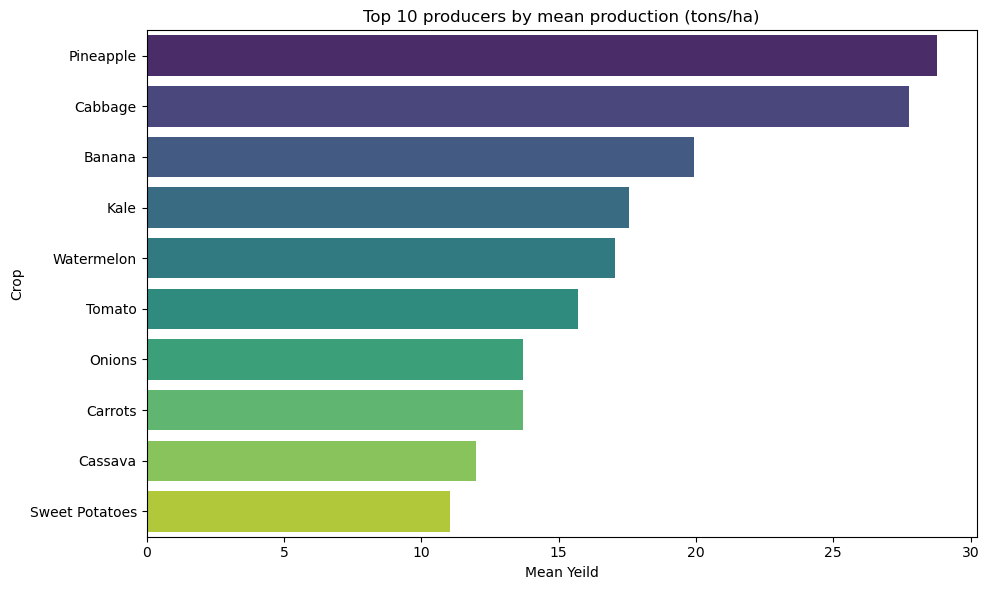

In [522]:
#Top 10 producing crops by mean:
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_best_crops,x='Yield',y='Product',palette='viridis')
plt.title('Top 10 producers by mean production (tons/ha)')
plt.xlabel('Mean Yeild')
plt.ylabel('Crop')
plt.tight_layout()
plt.show()

Pineaples, Cabbages and Bananas are the top 3 best producers.

In [523]:
mean_yielad_per_crop_per_year=(Kenya_crop_yeilds.groupby(['Product','Harvest_year'])['Yield'].mean().reset_index())
mean_yielad_per_crop_per_year.head()

,Product,Harvest_year,Yield
0,Bambara groundnut,2016,8.623748
1,Bambara groundnut,2017,8.021037
2,Bambara groundnut,2018,8.629628
3,Bambara groundnut,2019,2.606719
4,Bambara groundnut,2020,2.572460


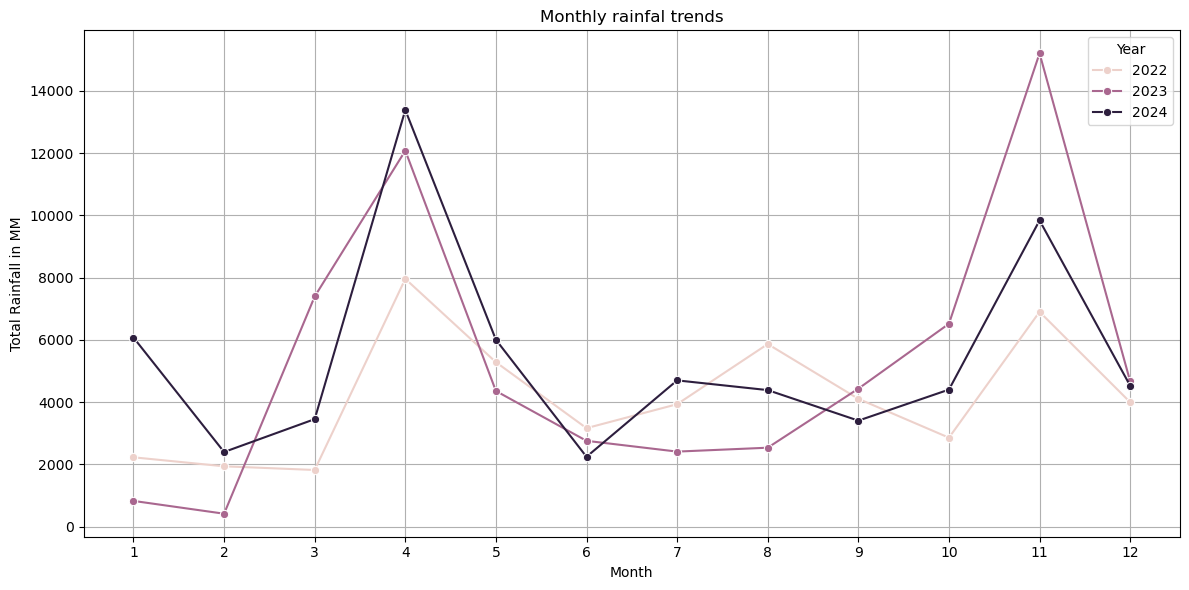

In [524]:
#Visulaizing rainfal rainflal trends in kenya
mothly_total=Mothly_Rainfal.groupby(['Year','Month'])['Rainfall_MM'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=mothly_total,x='Month',y='Rainfall_MM',hue='Year',marker='o')
plt.title("Monthly rainfal trends")
plt.xlabel("Month")
plt.ylabel("Total Rainfall in MM")
plt.xticks(range(1,13))
plt.grid(True)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

April and November are the two most rainy months  

February experiences the least rainfall

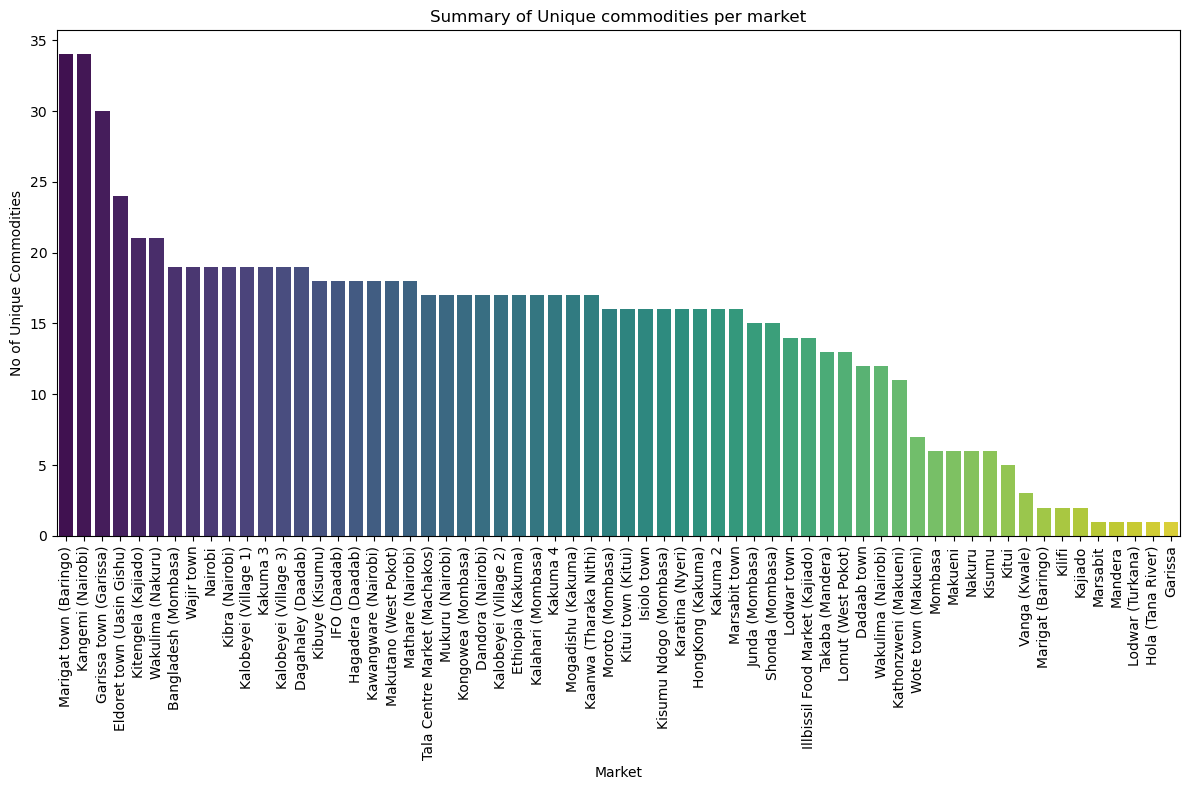

In [525]:
#Summary of products per market:
plt.figure(figsize=(12,8))
sns.barplot(
    data =Commodity_counts,
    x='Market',
    y='Unique_commodities',
    hue='Market',
    palette='viridis',
    legend=False)
plt.xticks(rotation=90)
plt.xlabel('Market')
plt.ylabel('No of Unique Commodities')
plt.title('Summary of Unique commodities per market')
plt.tight_layout()
plt.show()

Marigat, Kangemi and Garissa towns are the top 3 markest in terms of product diversity

C:\Users\HP\AppData\Local\Temp\ipykernel_1376\3060543915.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top10_commodities.index,x=top10_commodities.values,palette='viridis')


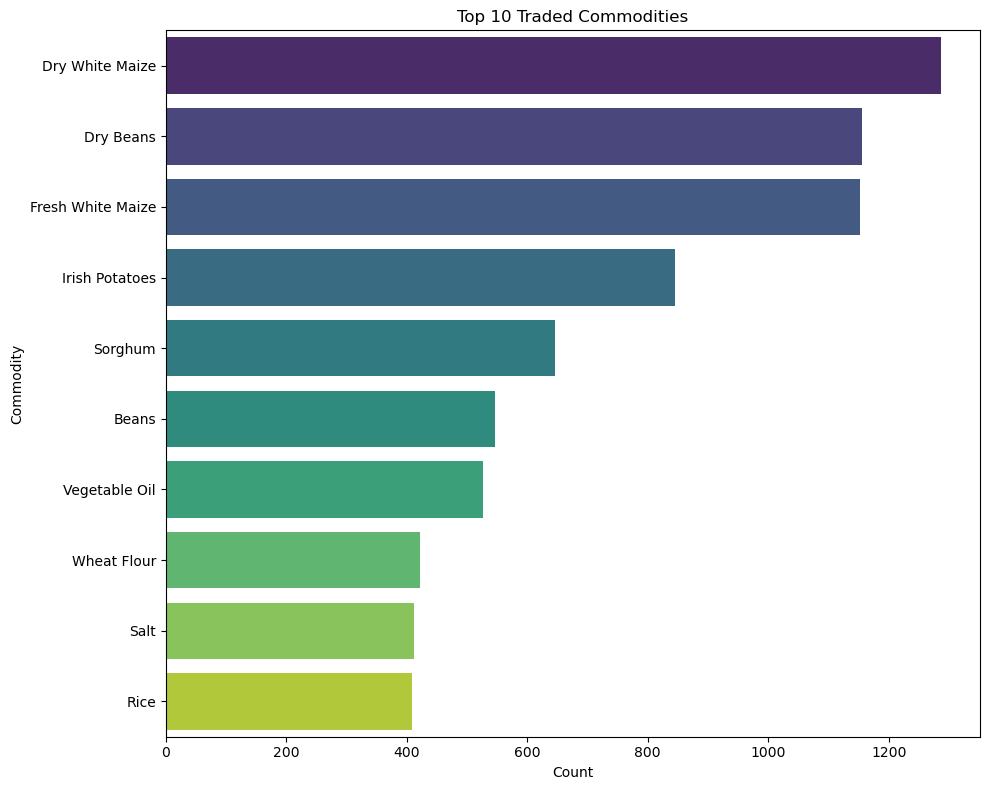

In [526]:
#Summary of top 10 traded commodities:
top10_commodities=foodprices['Commodity'].value_counts().head(10)
plt.figure(figsize=(10,8))
sns.barplot(y=top10_commodities.index,x=top10_commodities.values,palette='viridis')
plt.title('Top 10 Traded Commodities')
plt.xlabel('Count')
plt.ylabel('Commodity')
plt.tight_layout()
plt.show()

Dry Maize,Dry beans and freshbwhite maize are the top three traded products

In [527]:
# Summary of population by town:
map_center=[0.2,37.9]
m=folium.Map(location=map_center,zoom_start=5)
for _,row in towns.iterrows():
    folium.CircleMarker(location=[row['Latitude'],row['Longitude']],
                      radius=max(row['Population']/200000,5),
                      popup=f"{row['Town']}:{int(row['Population']):,} Population",
                      color='green',
                      fill=True,
                      fill_color='green',
                      fill_opacity=0.6).add_to(m)
m

There is more population close to Nairobi  in the western part of Kenya an indication of more demand for food products in those areas.

In [528]:
#previewing cleaned data sets:
cleaned_food_prices=foodprices
cleaned_food_prices.head()

,Date,Region,Subregion,Market,Market_ID,Latitude,Longitude,Category,Commodity,Commodity_ID,Unit,Price_Flag,Price_Type,Currency,Price_KES,Price_USD,Market_Name
1,2006-01-15,Coast,Mombasa,Mombasa,191,-4.05,39.67,Pulses And Nuts,Beans,50,KG,actual,Wholesale,KES,33.63,0.47,Mombaa
2,2006-01-15,Eastern,Kitui,Kitui,187,-1.37,38.02,Cereals And Tubers,Irish Potatoes,148,50 KG,actual,Wholesale,KES,1249.99,17.39,Kitui
3,2006-01-15,Eastern,Kitui,Kitui,187,-1.37,38.02,Cereals And Tubers,Sorghum,65,90 KG,actual,Wholesale,KES,1800.00,25.03,Kitui
4,2006-01-15,Eastern,Kitui,Kitui,187,-1.37,38.02,Pulses And Nuts,Dry Beans,262,KG,actual,Retail,KES,39.00,0.54,Kitui
5,2006-01-15,Eastern,Marsabit,Marsabit,190,2.33,37.98,Cereals And Tubers,Fresh White Maize,67,KG,actual,Retail,KES,21.00,0.29,Marabit


In [529]:
cleaned_towns=towns
cleaned_towns.head()


,Town,Latitude,Longitude,Country,Iso2,Admin_name,Capital,Population,Population_proper
0,Nairobi,-1.2864,36.8172,Kenya,KE,Nairobi City,primary,5545000.0,5545000.0
1,Mombasa,-4.0500,39.6667,Kenya,KE,Mombasa,admin,1208333.0,1200000.0
2,Nakuru,-0.3000,36.0667,Kenya,KE,Nakuru,admin,570674.0,307990.0
3,Eldoret,0.5167,35.2833,Kenya,KE,Uasin Gishu,admin,475716.0,289380.0
4,Kisumu,-0.0833,34.7667,Kenya,KE,Kisumu,admin,409928.0,409928.0


In [530]:
clean_daily_rainfall=rainfal
clean_daily_rainfall.head()

,Date,Rainfall_MM,Town,YearMonth
0,2022-01-01,0.0,Nairobi,2022-01
1,2022-01-02,0.0,Nairobi,2022-01
2,2022-01-03,0.0,Nairobi,2022-01
3,2022-01-04,0.0,Nairobi,2022-01
4,2022-01-05,0.0,Nairobi,2022-01


In [531]:
Clean_Mothly_Rainfal=Mothly_Rainfal
Clean_Mothly_Rainfal.head()

,Town,YearMonth,Rainfall_MM,Year,Month
0,Bungoma,2022-01,50.6,2022,1
1,Bungoma,2022-02,37.3,2022,2
2,Bungoma,2022-03,31.0,2022,3
3,Bungoma,2022-04,218.4,2022,4
4,Bungoma,2022-05,244.6,2022,5


In [533]:
Clean_Kenyan_crop_yeilds=Kenya_crop_yeilds
Clean_Kenyan_crop_yeilds.head()

,Fnid,Country,Country_code,Town,Admin_2,Product,Season_name,Planting_year,Planting_month,Harvest_year,Harvest_month,Crop_production_system,Qc_flag,Area,Production,Yield
79170,KE2013A101,Kenya,KE,Mombasa,none,Banana,Annual,2013,1,2012,12,All (PS),0,125.1,1110.0,8.872902
79171,KE2013A101,Kenya,KE,Mombasa,none,Banana,Annual,2014,1,2013,12,All (PS),0,121.5,952.0,7.835391
79172,KE2013A101,Kenya,KE,Mombasa,none,Banana,Annual,2023,1,2022,12,All (PS),0,39.0,600.0,15.384615
79173,KE2013A101,Kenya,KE,Mombasa,none,Beans (mixed),Annual,1986,1,1985,12,All (PS),0,3.0,2.0,0.666667
79174,KE2013A101,Kenya,KE,Mombasa,none,Beans (mixed),Annual,1987,1,1986,12,All (PS),0,7.0,6.0,0.857143
